# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

First install numpy / pandas / matplotlib

` conda install numpy`

` conda install pandas`

` conda install matplotlib`

(ou `pip install` si trop lent)

Si forking les exercices: `jupyter trust Semaine2-exercices.ipynb`

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
data = pd.read_csv("ex1data1.csv")

To display data set :

In [4]:
df = pd.DataFrame(data)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


!! If needed `%matplotlib inline`

!! Or `plt.show()`

### Visualiser les données

!! To display help either

type the function with question mark before `?data.plot.scatter()`

or type the function then `shift`+`tab`

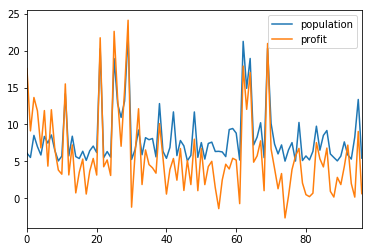

In [27]:
data.plot.line()

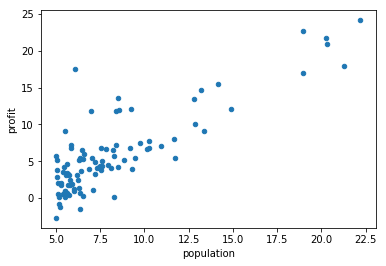

In [5]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [6]:
X = data.population
y = data.profit

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [7]:
theta = np.array([0.,0.])

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [8]:
def predictFOR(X, theta):
    z = np.empty(X.size)
    for i in range(X.size):
        z[i] = theta[1]*X[i] + theta[0] 
    return z
def predict(X, theta):
    z = theta[1] * X + theta[0]
    return z
theta = np.array([0.,0.])
predict(X, theta)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
91    0.0
92    0.0
93    0.0
94    0.0
95    0.0
96    0.0
Name: population, Length: 97, dtype: float64

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [10]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.size
    
    # Boucler sur le nombre d'itérations
    for i in range (num_iters):
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        thetatmp = theta
        z = predict(X, thetatmp)
        v = z - y
        w = v * X
        theta[0] = theta[0] - alpha / m * sum (v)
        # could also be 
        #theta[0] = theta[0] - alpha / m * v.sum()
        theta[1] = theta[1] - alpha / m * sum (w)           
    return theta

theta = np.array([0.,0.])

def fitFOR(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.size
    
    # Boucler sur le nombre d'itérations
    for i in range (num_iters):
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        thetatmp = theta
        z = predict(X, thetatmp)
        v = np.empty(m)
        w = np.empty(m)
        for j in tqdm(range(m)):
            v[j] = z[j] - y[j]
            w[j] = v[j] * X[j]
        theta[0] = theta[0] - alpha / m * sum (v)
        theta[1] = theta[1] - alpha / m * sum (w)           
    return theta

theta = np.array([0.,0.])
fit(X, y, theta, 0.01, 1500)

array([-3.63029144,  1.16636235])

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [11]:
fit(X, y, theta, 0.01, 15000)

array([-3.89578088,  1.19303364])

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [80]:
#import matplotlib.pyplot as plt
#already done above

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()
def vizual(theta):
    fig = plt.figure()
    ax = plt.axes()
    xmin = X.min() - 0.05*abs(X.max()-X.min())
    xmax = X.max() + 0.05*abs(X.max()-X.min())
    ax.set_xlim([xmin, xmax] )
    ax.set_ylim([y.min() - 0.05*y.min(), y.max() + 0.05*y.max()])
    ax.scatter(X, y)
    line_x = np.linspace(0, X.max(),20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()
    

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

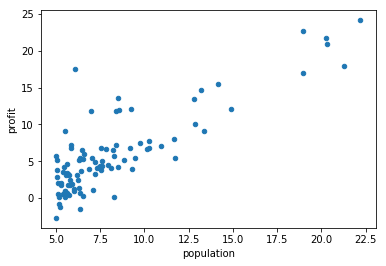

In [75]:
data.plot.scatter('population', 'profit')

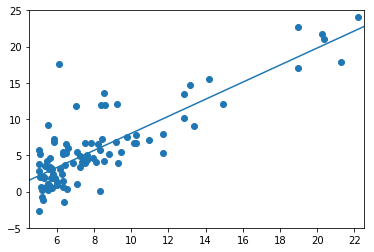

In [76]:
visualize(theta)

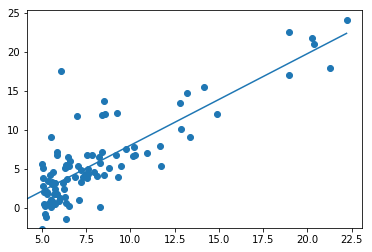

In [81]:
vizual(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [15]:
# verify our value of theta
theta
def cost(X, y, theta):
    m = X.size
    # investigate how to do ^ 2 on a vector in python
    v = (predict(X, theta) - y) * (predict(X, theta) - y)
    return (1 / (2 *m) * sum(v))


### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [16]:
cost(X, y , np.array([0.,0.]))

32.072733877455654

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [17]:
cost(X, y , np.array([-1.,2.]))

54.24245508201238

(result ok)

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [30]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.size
    J_history = np.empty(num_iters)
    theta_history = []
    # Boucler sur le nombre d'itérations
    m = X.size
    
    # Boucler sur le nombre d'itérations
    for i in range (num_iters):
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        thetatmp = theta
        z = predict(X, thetatmp)
        v = z - y
        w = v * X
        theta[0] = theta[0] - alpha / m * sum (v)
        # could also be 
        #theta[0] = theta[0] - alpha / m * v.sum()
        theta[1] = theta[1] - alpha / m * sum (w)           
        J_history[i] = cost(X, y, theta)
        theta_history.extend([theta[0],theta[1]])
    return theta, J_history, theta_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [31]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [32]:
from tqdm import tqdm

In [33]:
# Lancez l'entraînement avec votre nouvelle fonction
theta , J_history, theta_history = fit_with_cost(X, y, theta, 0.01, 1800)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

In [34]:
J_history
#y
#theta_history

array([6.73719046, 5.93159357, 5.90115471, ..., 4.47916075, 4.47915286,
       4.47914501])

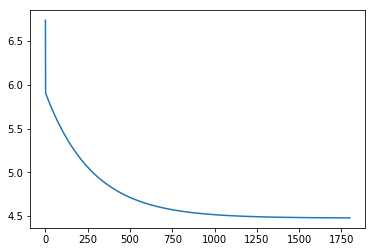

In [35]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

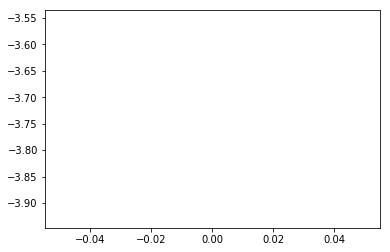

In [25]:
fit = plt.figure()
ax = plt.axes()
ax.plot(theta[0])

# Exercices Numpy

 ## La suite d'exercices suivants a pour but de vous faire comprendre le fonctionnement des numpy array et leurs avantages/defaults par rapport aux listes de python.

### Creez une liste A nommée "list_A" contenant les éléments (0, 1, 1, 2, 3, 5, 8). A partir de cette liste créez un numpy array nommé "np_A"

In [21]:
list_A = (0, 1, 1, 2, 3, 5, 8)
array_A = [0, 1, 1, 2, 3, 5, 8]
# wait above is not an array but a list
# luckily np knows how to change that and consider it an array
np_A = np.array(list_A)
np_Aprime = np.array(array_A)
print(list_A)
print(array_A)
print(np_A)
print(np_Aprime)

(0, 1, 1, 2, 3, 5, 8)
[0, 1, 1, 2, 3, 5, 8]
[0 1 1 2 3 5 8]
[0 1 1 2 3 5 8]


### Affichez votre numpy array. Ainsi que : sa forme, sa taille, sa dimension et son type

In [22]:
#no idea about "form" OOOPS it is "shape" simply
print(np_A.shape)
print(np_A.size)
print(np_A.ndim)
print(np_A.dtype)

(7,)
7
1
int64


### Ajoutez 2 a chaque element de la liste "list_A"

In [23]:
#this is important
list_D = [x + 2 for x in list_A]
#note that 
[x + 2 for x in list_A]
# will only add AND return all elements to the output, but the list remains the same
list_D

[2, 3, 3, 4, 5, 7, 10]

### Ajoutez 2 a chaque élément de votre numpy array (votre solution ne doit pas utiliser de boucles)

In [24]:
print(np_A)
np_A += 2
np_A

[0 1 1 2 3 5 8]


array([ 2,  3,  3,  4,  5,  7, 10])

### Calculez la somme de tous les éléments de "np_A" (sans utiliser de boucle)

In [25]:
print(sum(np_A))
#or
print(np_A.sum())

34
34


### Convertissez les elements de votre numpy array en float

In [26]:
np_A = np_A * 1.0
print(np_A)
#alternatively 
np_B = np.array(list_A)
np_B = np_B.astype(float)
print(np_B)
np_A = np_A.astype(int)
print(np_A)

[ 2.  3.  3.  4.  5.  7. 10.]
[0. 1. 1. 2. 3. 5. 8.]
[ 2  3  3  4  5  7 10]


### Convertissez votre numpy array en une liste python

In [27]:
list_C = np_A.tolist()
# but it has square brackets, is it a python array ?
print(list_C)

[2, 3, 3, 4, 5, 7, 10]


### Exécutez les trois cellules suivantes pour visualiser les matrices M et N

In [28]:
M = np.random.randint(10, size=(4,4))
N = np.random.randint(10, size=(4,4))

In [29]:
M
print(M)

[[5 2 7 1]
 [0 8 5 4]
 [7 7 6 5]
 [4 1 0 6]]


In [30]:
N
print(N)

[[6 7 6 6]
 [3 6 7 4]
 [6 1 8 0]
 [0 2 8 6]]


### Aditionnez les deux matrices

In [31]:
M + N

array([[11,  9, 13,  7],
       [ 3, 14, 12,  8],
       [13,  8, 14,  5],
       [ 4,  3,  8, 12]])

### Calculez le produit matriciel de M et N. Vérifiez votre opération en calculant les premières cellules à la main

In [32]:
print(np.matmul(M,N))
print(M.dot(N))
#np.matmul(M,N) - M.dot(N)

[[ 78  56 108  44]
 [ 54  61 128  56]
 [ 99 107 179 100]
 [ 27  46  79  64]]
[[ 78  56 108  44]
 [ 54  61 128  56]
 [ 99 107 179 100]
 [ 27  46  79  64]]


### ** Bonus: Écrivez vous-mêmes une fonction de produit matriciel, avec des boucles imbriquées 

In [33]:
MM = np.random.randint(10, size=(4,3))

In [34]:
print(MM)
MM[0,0]

[[6 2 8]
 [5 1 7]
 [2 7 5]
 [6 6 7]]


6

In [35]:
m_l, m_c = M.shape
n_l, n_c = N.shape
#for i in range(M.size)
#    for j in range()
O = np.zeros((m_l,n_c))
O

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [36]:

print(np.matmul(M,N))
def matrix_multiply(M,N):
    #tqdm()
    m_l, m_c = M.shape
    n_l, n_c = N.shape
    O = np.zeros((m_l,n_c))
    for i in range(m_l): #first matrix first line
        for j in range(n_c): #2nd matrix first col
            for k in range(m_c): #first matrix column
                O[i,j] += M[i,k]*N[k,j]
# j'ai galéré et j'ai du aller regarder sur internet
    return O

O = matrix_multiply(M,N)

print(O)

[[ 78  56 108  44]
 [ 54  61 128  56]
 [ 99 107 179 100]
 [ 27  46  79  64]]
[[ 78.  56. 108.  44.]
 [ 54.  61. 128.  56.]
 [ 99. 107. 179. 100.]
 [ 27.  46.  79.  64.]]


### ** Comparez son temps de calcul à la fonction de numpy avec de très grosses matrices en entrée

In [37]:
MM = np.random.randint(10, size=(100,40))
NN = np.random.randint(10, size=(40,100))
OO = matrix_multiply(MM,NN)
print(OO)
OO = np.matmul(MM,NN)
print(OO)

[[ 716.  813.  836. ...  579.  721.  826.]
 [ 688.  814.  738. ...  703.  645.  715.]
 [ 995. 1144.  969. ...  895. 1008. 1098.]
 ...
 [ 744.  937.  841. ...  637.  856.  863.]
 [ 750.  846.  626. ...  719.  700.  783.]
 [ 746.  777.  710. ...  674.  777.  806.]]
[[ 716  813  836 ...  579  721  826]
 [ 688  814  738 ...  703  645  715]
 [ 995 1144  969 ...  895 1008 1098]
 ...
 [ 744  937  841 ...  637  856  863]
 [ 750  846  626 ...  719  700  783]
 [ 746  777  710 ...  674  777  806]]


## Aller plus loin avec numpy (optionnal)

### Creez une liste a deux dimension ((1,2,3), (2,1,3), (3,2,1), (1,3,2)) nommée "list_B". Convertissez le en numpy array "np_B"

In [38]:
list_B = ((1,2,3), (2,1,3), (3,2,1), (1,3,2))
list_B
np_B = np.array(list_B)
np_B

array([[1, 2, 3],
       [2, 1, 3],
       [3, 2, 1],
       [1, 3, 2]])

### Extrayez les deux premiere lignes et colonnes de "np_B". En sortie on obtient ((1,2),(2,1))

In [39]:
np_B[:2,:2] # range of row THEN range of col (think LINCOL = LINeCOLumN )

array([[1, 2],
       [2, 1]])

### Creez un masque qui montre toutes les valeurs egales a 1. 

In [40]:
# V = [( y[x] , None)[y[x] == 1] for y in x in np_B]
# V = [x for x in np_B]

np_Bmask = np.ma.masked_not_equal(np_B, 1)
print(np_B)
np_Bmask
# much easier
V = np_B == 1
V.astype(int)

[[1 2 3]
 [2 1 3]
 [3 2 1]
 [1 3 2]]


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

### Pour toutes les valeurs du masque multipliez la valeur par 3

In [41]:
MMM = (np_B == 1)*3
MMM

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3],
       [3, 0, 0]])

### Creez un nouveau numpy array "np_C" avec les valeurs (0, 0, 1, 2, 3, 5, 8) (en 1 dimension)

In [42]:
np_C = np.array((0, 0, 1, 2, 3, 5, 8))
np_C

array([0, 0, 1, 2, 3, 5, 8])

### Trouvez le minimum, maximum et la moyenne du numpy array "np_C"

In [43]:
print(max(np_C))
#or
print(np_C.max())

print(min(np_C))
#or
print(np_C.min())

np_C.mean()

8
8
0
0


2.7142857142857144

### Creez une fonction qui prend un nombre en parametre et renvoie son carré. Appliquez cette fonction a chaque element de votre numpy array a l'aide de la fonction vectorize 

In [44]:
?np.vectorize

In [45]:
def square(N):
    return N * N

vsquare = np.vectorize(square)
vsquare(np_C)

array([ 0,  0,  1,  4,  9, 25, 64])

### Changez la dimension cd "np_B" pour qu'elle passe de 4 * 3 a 3 * 4

In [46]:
# this is a pivot or a whatever we call it... ah yes a transposition
print(np_B)
np_B.transpose()

[[1 2 3]
 [2 1 3]
 [3 2 1]
 [1 3 2]]


array([[1, 2, 3, 1],
       [2, 1, 2, 3],
       [3, 3, 1, 2]])

### Changez la dimension de np_B pour passer a un numpy array d'une seule dimension (flatten, ravel)

In [47]:
print(np_B.flatten()) #returns a copy
print(np_B.ravel()) #returns a view so you could modify original values !!!

print(np_B.flatten().base) #shows it's based on nothing
print(np_B.ravel().base) # shows the underlying base 

[1 2 3 2 1 3 3 2 1 1 3 2]
[1 2 3 2 1 3 3 2 1 1 3 2]
None
[[1 2 3]
 [2 1 3]
 [3 2 1]
 [1 3 2]]


### Travail sur une image

In [48]:
#conda install scikit-image

(183, 275, 3)

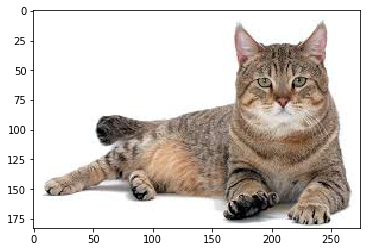

In [51]:
#install scikit-image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
photo = io.imread("cat.jpeg")
plt.imshow(photo)
photo.shape

### A l'aide du slicing inversez l'orientation de l'image (le bas est en haut)

### A l'aide du slicing créez un mirroir de l'image d'origine

### A l'aide de np.where appliquez un masque qui converti les pixels en dessous de 100 en 0 et au dessus en 255

### Transposez l'image

Pour ceux souhaitant aller plus loin sur numpy quelques pistes intéressantes qui restent à explorer : les séquences, le sampling avec random choice, uniqs et count

## En résumé les numpy array ont les particularités suivantes :
- ils supportent des operations vectorizées (opérations sur chaque élements de la matrice)
- la taille d'un numpy array ne peux etre changé
- il n'y a qu'un type de donnée dans un numpy array
- ils prennent beaucoup moins de place 